# Biorefinery Tweets Dataset Descriptive Statistics

## Questions
1. First tweet about biorefineries
    1. When did the fist tweet about biorefineries appear?
    2. What did it say?
    3. Who did it say it? 
    4. To what field does the author belong?
2. Time & fequency: how many tweetas about biorefinery are per year? How does it compare to all tweets?
2. Oldest tweet in relation to the network age
3. Proportions of discussions / retweets with sole tweets / unfavorited
4. Growth of the subject level of discussion, in relation to the growth of the network usage
5. Are there clusters of frequent interacting actors? 
   1. Is it possible to link it with _real-world_ links? (associations, contracts, commercial relations)
6. What is noise in a tweeter feed? Has it been defined, measured, operationalized?
7. Proportion of personal and organization accounts

## Compiled answers (2021-05-30 to ...)
1. First tweet about biorefineries
    1. The first tweet was on 2015-09-19 02:38:56 UTC
    2. It said "Good morning, I've been busy to get this day going. Writing, reading, figuring out things around biotech, clean tech an biorefineries.
    3. It was tweeted by Helge Keitel (@digitalvillages)
    4. He is at "Business developmnet at KK-net" (maybe his own company), same as when he tweet it. Maybe he is a sort of trader or venture capitalist.
2. 

## Imports

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

## Importing and combining the data

Tweets containing the keywords "biorefinery" or "biorefineries" up until 2021-....

Tweets where downloaded and combined localy, the following script loads and merges two pikle files: one with individual tweets, aand another with each user information. From both datasets, columns irrelevant for the study where removed.

In [9]:
def load_pickle_and_combine(tweets_pkl, users_pkl, on_column, rename_cols):
    tweets = pd.read_pickle(tweets_pkl)
    tweets_df = pd.DataFrame(tweets)  # sequence suggested by Albert

    users = pd.read_pickle(users_pkl)
    users_df = pd.DataFrame(users)

    del tweets
    del users

    users_df['user_id'] = users_df.index
    tweets_df['id'] = tweets_df.index
    biorefinery_df = pd.merge(tweets_df, users_df, on=on_column)
    biorefinery_df.rename(columns=rename_cols, inplace=True)
    biorefinery_df.set_index('id', inplace=True)

    del tweets_df
    del users_df

    return biorefinery_df


tweets_pkl_file = '../data/biorefinery_tweets_df_cleaned.pkl4'
users_pkl_file = '../data/biorefinery_users_df_cleaned.pkl4' # seralized to protocol 4 to work with Python v3.7
join_on_column = 'user_id'
columns_renaming = {
    'created_at_x': 'tweet_created_at',
    'created_at_y': 'user_created_at',
    'favourites_count': 'user_favourites_count'
}

df = load_pickle_and_combine(tweets_pkl_file, users_pkl_file, join_on_column, columns_renaming)

del tweets_pkl_file
del users_pkl_file
del join_on_column
del columns_renaming

In [10]:
#testing
df.info()
print("-------------")
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30276 entries, 425574962 to 1375572450994397184
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype              
---  ------                             --------------  -----              
 0   tweet_created_at                   30276 non-null  datetime64[ns, UTC]
 1   full_text                          30276 non-null  object             
 2   display_text_range                 30276 non-null  object             
 3   in_reply_to_status_id              881 non-null    Int64              
 4   in_reply_to_user_id                1725 non-null   Int64              
 5   user_id                            30276 non-null  int64              
 6   is_quote_status                    30276 non-null  bool               
 7   retweet_count                      30276 non-null  int64              
 8   favorite_count                     30276 non-null  int64              
 9   reply_count                 

,in_reply_to_status_id,in_reply_to_user_id,user_id,retweet_count,favorite_count,reply_count,quote_count,conversation_id,followers_count,friends_count,listed_count,user_favourites_count
count,8.810000e+02,1.725000e+03,3.027600e+04,30276.000000,30276.000000,30276.000000,30276.000000,3.027600e+04,3.027600e+04,30276.000000,30276.00000,30276.000000
mean,8.778714e+17,1.539785e+17,1.076340e+17,2.373960,5.122440,0.242767,0.346116,6.518266e+17,1.242781e+04,1587.262122,162.60183,2674.023847
std,4.173361e+17,3.634558e+17,3.034549e+17,151.705952,473.437565,22.312606,26.448830,4.102752e+17,3.972569e+05,5826.755306,1618.71627,12125.853268
min,4.172762e+09,1.300000e+01,1.073300e+04,0.000000,0.000000,0.000000,0.000000,4.255750e+08,0.000000e+00,0.000000,0.00000,0.000000
25%,5.557336e+17,7.402406e+07,8.367065e+07,0.000000,0.000000,0.000000,0.000000,2.788816e+17,3.020000e+02,123.000000,8.00000,1.000000
50%,9.916334e+17,3.530258e+08,3.542985e+08,0.000000,0.000000,0.000000,0.000000,6.452278e+17,9.320000e+02,536.000000,33.00000,107.000000
75%,1.255444e+18,2.438302e+09,2.330618e+09,1.000000,1.000000,0.000000,0.000000,9.992550e+17,3.312000e+03,1394.000000,117.00000,1201.000000
max,1.375423e+18,1.374000e+18,1.374000e+18,24137.000000,81363.000000,3784.000000,3387.000000,1.375572e+18,4.526010e+07,331374.000000,126430.00000,517479.000000


## Frequency and growth

New DF counting the number of tweets about BR per year, and adding the Twitter network size, as million daily active users

In [11]:
percentiles = list(range(10, 100, 10))
percentiles = [x / 100 for x in percentiles]


description = df.describe(percentiles=percentiles, include='all', datetime_is_numeric=True)

df_grupped_year = df.groupby(df['tweet_created_at'].dt.year)['full_text'].count()

df_grupped_year = pd.DataFrame(df_grupped_year)

twitter_MAU = {
    "2007": np.NaN,
    "2008": np.NaN,
    "2009": np.NaN,
    "2010": 54,
    "2011": 117,
    "2012": 185,
    "2013": 241,
    "2014": 288,
    "2015": 305,
    "2016": 318,
    "2017": 330,
    "2018": 321,
    "2019": 330,
    "2020": 353,
    "2021": np.NaN
}  # source: Twitter financial statements and https://backlinko.com/twitter-users accessed on 2021-05-30

df_grupped_year.reset_index(inplace=True)

df_grupped_year.rename(
    columns={'tweet_created_at': 'Year', 'full_text': 'Biorefinery tweets'},
    inplace=True
    )

df_grupped_year['Twitter million daily active users'] = twitter_MAU.values()


Plotting and comparing the evolution.

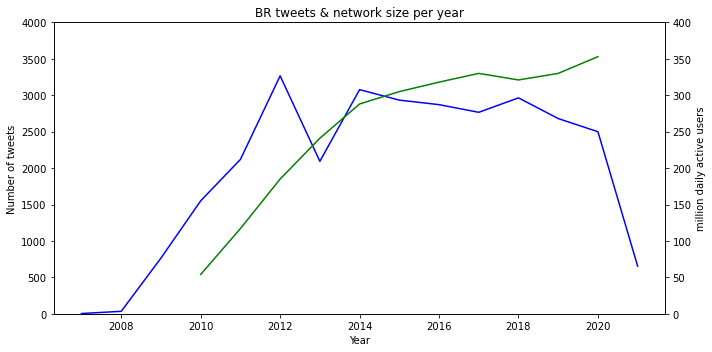

In [12]:
# plotting figures by creating aexs object
# using subplots() function
fig, ax = plt.subplots(figsize = (10, 5))
plt.title('BR tweets & network size per year')
  
# using the twinx() for creating another
# axes object for secondry y-Axis
ax2 = ax.twinx()
ax.plot(df_grupped_year['Year'], df_grupped_year['Biorefinery tweets'], color = 'b')
ax2.plot(df_grupped_year['Year'], df_grupped_year['Twitter million daily active users'], color = 'g')
  
# giving labels to the axises
ax.set_xlabel('Year', color = 'k')
ax.set_ylabel('Number of tweets', color = 'k')
  
# secondary y-axis label
ax2.set_ylabel('million daily active users', color = 'k')


# ax.set_ylabel('Number of tweets containing "biorefinery"')
ax.set_ylim(0, 4000)
ax2.set_ylim(0, 400)

# defining display layout 
plt.tight_layout()
  
# show plot
plt.show()

In [13]:
df_grupped_year

,Year,Biorefinery tweets,Twitter million daily active users
0,2007,4,NaN
1,2008,34,NaN
2,2009,765,NaN
3,2010,1551,54.0
4,2011,2119,117.0
5,2012,3266,185.0
6,2013,2093,241.0
7,2014,3077,288.0
8,2015,2933,305.0
9,2016,2871,318.0


## Questions about time growth
2. Time & fequency: how many tweetas about biorefinery are per year? How does it compare to all tweets?
3. Oldest tweet in relation to the network age

## Answers from previos plot and table
2. Tweets count grwo from the start of the network, in a similar slope as the network, but stabilize and start a slow descend in 2014, while the network keeps slowly growing.
3. The oldest tweet is from 2007, just a year after the network was created.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=871ffec2-54c7-4bc1-854a-6bcd2254c0fb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>